## 1. Descarga de datos
Hay una descripción en Kaggle, esta es la página Web: https://www.kaggle.com/teajay/global-sharkattacks
(https://www.kaggle.com/teajay/global-shark-attacks)
Y el enlace a la descarga directa es el siguiente: https://www.kaggle.com/teajay/global-shark-attacks
/downloads/global-shark-attacks.zip (https://www.kaggle.com/teajay/global-shark-attacks/downloads
/global-shark-attacks.zip) Nótese que kaggle requiere identificarse, por lo que no pueden descargarse
sin autentificación los ficheros.
Se pide lo siguiente:
1. Cargad el fichero en un DataFrame de pandas.
1. Comparad las columns cargadas con las del fichero Excel.
1. ¿Hay información que deberíamos quitar? Nota: con columns podemos obtener la lista de columnas del DataFrame.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_ta = pd.read_csv('attacks.csv')


In [4]:
print data_ta.size
print len(data_ta)
data_ta.head()

95872
5992


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2016.09.18.c,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,17-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,2016.09.15,16-Sep-2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


In [5]:
col_data = data_ta.columns #Devuelve las columnas del Data.Frame
col_data

Index([u'Case Number', u'Date', u'Year', u'Type', u'Country', u'Area',
       u'Location', u'Activity', u'Name', u'Sex ', u'Age', u'Injury',
       u'Fatal (Y/N)', u'Time', u'Species ', u'Investigator or Source'],
      dtype='object')

## 2. Observación de valores nulos
El siguiente paso es observar los datos, los valores que toman y si hay valores nulos.
1. Identificad las columnas en las que hay valores nulos y las que no y cuántas en cada una. Por 
ejemplo, parece que las hay en la columna Species. Nota: usar isnull()
1. Para las columnas con información categórica, observar las etiquetas de cada categoría, por 
ejemplo, las especies de tiburones o el tipo de incidente.
1. Concretamente, obtener las 5 especies de tiburón con más incidentes registrados en la base de
datos. Nota: Puede hacers con groupby() o dividiendo el array por especies, y contando cada
subconjunto.

In [6]:
data_ta.isnull().head(20) #me devuelve una tabla de F/T que contiene los campos que si es T es vacio o null

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
data_ta.isnull().sum() #devuelve la cuenta de Null de cada columna

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
dtype: int64

In [8]:
data_species = data_ta.copy()
data_species = data_species['Species '].unique()
data_type = data_ta['Type'].unique()
print data_species
print ('-------------------------------------------------------')
print data_type

[nan '2 m shark' "3' to 4' shark" ..., "12' tiger shark" 'Blue pointers'
 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable']
-------------------------------------------------------
['Unprovoked' 'Boat' 'Provoked' 'Invalid' 'Sea Disaster' 'Boating']


In [8]:
SharkSpecie = data_ta.copy()
SharkSpecie = SharkSpecie.groupby('Species ').count() # agrupa por species de tiburones y los cuenta
SharkSpecie.sort_values('Case Number', ascending = False).head(5) #ordena la especie de tiburones, los primeros 5

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Investigator or Source
Species,,,,,,,,,,,,,,,
White shark,161,161,161,161,161,157,155,155,157,137,93,160,160,93,161
Shark involvement not confirmed,80,80,80,80,78,76,75,69,75,71,45,79,80,39,79
Tiger shark,68,68,68,68,68,62,59,65,67,64,43,68,68,32,68
Bull shark,52,52,52,52,52,48,51,47,51,50,39,52,52,34,52
6' shark,40,40,40,40,40,38,38,38,39,39,29,40,40,19,40


## 3. Más valores nulos
Vamos a examinar la ocurrencia de eventos por años y países. Para ello:

1. Queremos utilizar como índice (país, año) primero. Probar a establecerlo con set_index()
¿Hay algún problema de valores nulos en el índice? ¿Son NA o también hay años no válidos?¿Cómo se pueden eliminar?
1. Obtener la cuenta de los incidentes en USA en 2014 y 2015. Utilizad .loc e .iloc en la misma expresión.

In [9]:
data_ta1 = data_ta.copy()
data_ta.set_index(['Country','Year']).head() #me  agrupa los index primero por Country y luego por Year

Case Number         Date        Type      Area  \
Country   Year                                                    
USA       2016  2016.09.18.c  18-Sep-2016  Unprovoked   Florida   
          2016  2016.09.18.b  18-Sep-2016  Unprovoked   Florida   
          2016  2016.09.18.a  18-Sep-2016  Unprovoked   Florida   
AUSTRALIA 2016    2016.09.17  17-Sep-2016  Unprovoked  Victoria   
          2016    2016.09.15  16-Sep-2016  Unprovoked  Victoria   

                                        Location Activity             Name  \
Country   Year                                                               
USA       2016  New Smyrna Beach, Volusia County  Surfing             male   
          2016  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano   
          2016  New Smyrna Beach, Volusia County  Surfing             male   
AUSTRALIA 2016                  Thirteenth Beach  Surfing  Rory Angiolella   
          2016                       Bells Beach  Surfing             male   

               Sex   Age                                 Injury Fatal (Y/N)  \
Country   Year                                                                
USA       2016    M   16                  Minor injury to thigh           N   
          2016    M   36                   Lacerations to hands           N   
          2016    M   43               Lacerations to lower leg           N   
AUSTRALIA 2016    M  NaN           Struck by fin on chest & leg           N   
          2016    M  NaN  No injury: Knocked off board by shark           N   

                 Time   Species        Investigator or Source  
Country   Year                                                 
USA       2016  13h00        NaN  Orlando Sentinel, 9/19/2016  
          2016  11h00        NaN  Orlando Sentinel, 9/19/2016  
          2016  10h43        NaN  Orlando Sentinel, 9/19/2016  
AUSTRALIA 2016    NaN        NaN           The Age, 9/18/2016  
          2016    NaN  2 m shark           The Age, 9/16/2016

In [10]:
#data_ta1['Year'].unique()
data_ta1 = data_ta1[data_ta1['Year'] > 500] #data_ta1 contiene Years > 500 años (5865 registros)

data_ta2 = data_ta1.copy() # se crea data_ta2 se quiere quitar los 'Null or NaN' de los country

data_ta2 = data_ta2[pd.notnull(data_ta2['Country'])] # se quiere ahora quiter los Null de country

data_ta2.set_index(['Country','Year']).head(5) # set_index sin null en country y year >500 (5827 registros)


Case Number         Date        Type      Area  \
Country   Year                                                    
USA       2016  2016.09.18.c  18-Sep-2016  Unprovoked   Florida   
          2016  2016.09.18.b  18-Sep-2016  Unprovoked   Florida   
          2016  2016.09.18.a  18-Sep-2016  Unprovoked   Florida   
AUSTRALIA 2016    2016.09.17  17-Sep-2016  Unprovoked  Victoria   
          2016    2016.09.15  16-Sep-2016  Unprovoked  Victoria   

                                        Location Activity             Name  \
Country   Year                                                               
USA       2016  New Smyrna Beach, Volusia County  Surfing             male   
          2016  New Smyrna Beach, Volusia County  Surfing   Chucky Luciano   
          2016  New Smyrna Beach, Volusia County  Surfing             male   
AUSTRALIA 2016                  Thirteenth Beach  Surfing  Rory Angiolella   
          2016                       Bells Beach  Surfing             male   

               Sex   Age                                 Injury Fatal (Y/N)  \
Country   Year                                                                
USA       2016    M   16                  Minor injury to thigh           N   
          2016    M   36                   Lacerations to hands           N   
          2016    M   43               Lacerations to lower leg           N   
AUSTRALIA 2016    M  NaN           Struck by fin on chest & leg           N   
          2016    M  NaN  No injury: Knocked off board by shark           N   

                 Time   Species        Investigator or Source  
Country   Year                                                 
USA       2016  13h00        NaN  Orlando Sentinel, 9/19/2016  
          2016  11h00        NaN  Orlando Sentinel, 9/19/2016  
          2016  10h43        NaN  Orlando Sentinel, 9/19/2016  
AUSTRALIA 2016    NaN        NaN           The Age, 9/18/2016  
          2016    NaN  2 m shark           The Age, 9/16/2016

Country  Year
USA      2014    65
         2015    72
dtype: int64


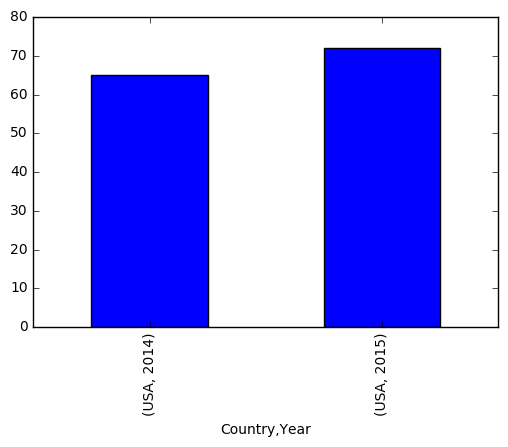

In [11]:
#Indexando por .loc[ ]
CY = data_ta2.copy()

CY = CY[['Country','Year']].groupby(['Country','Year']).size()
print CY.loc['USA',2014:2015]

CY.loc['USA',2014:2015].plot.bar()

#data_ta2[(data_ta2.Country == 'USA')&((data_ta2.Year == 2014)|(data_ta2.Year == 2015))].groupby(['Year','Country']).size()#.agg({'Country': np.size})


In [12]:
#Indexando por .iloc[ ]
CY = data_ta2.copy()

CY = CY[['Country','Year']].groupby(['Country','Year']).size()
print CY.loc['USA',2014:2015]

CY.loc['USA'].iloc[2014:2015]

#CY.stack().unstack('Country').apply(mean)
#CY.loc[2014,(CY[CY['Country'] == 'USA'])].count()

Country  Year
USA      2014    65
         2015    72
dtype: int64


Series([], dtype: int64)

## 4. Distribución y correlaciones (i)
Ahora queremos observar la distribución de los incidentes, primero por países y luego por años.

1. Mostrar los tres países que tienen más incidentes.
1. Dibujar la distribución por años de los incidentes, señalar el año en el que más se han producido.
1. Para los dos países con más incidentes, mostrar su evolución por años.

              Year
Country           
USA           2099
AUSTRALIA     1262
SOUTH AFRICA   557


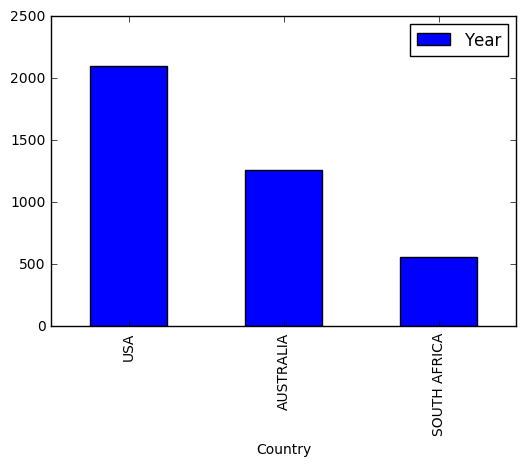

In [42]:
#IC = Incident/Country incidentes por país

IC = data_ta2.copy()
cols = ['Country', 'Year']


IC = IC[cols].groupby('Country').count().sort_values('Year',ascending=False).head() #devuelve los paises con mas incidentes Rank3

CountryRank = IC.head(3)
print CountryRank

IC.head(3).plot.bar()



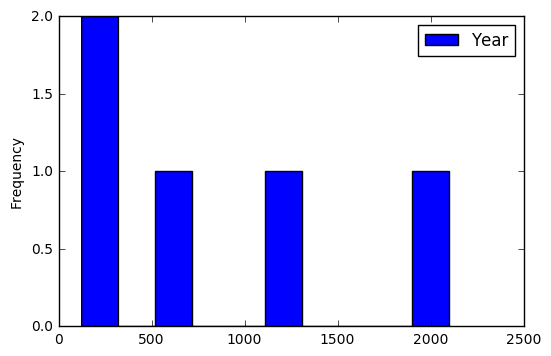

In [43]:
%matplotlib inline

ICI = IC.index.values

IC.plot.hist() # colocamos la coma para que no se muestren los valores que se plotean
#plt.xlabel('Country')
#plt.ylabel('Frecuencies')
#plt.title('Incidents by Countries')

Year
2015    139
2011    128
2014    124
2013    122
2008    121
dtype: int64


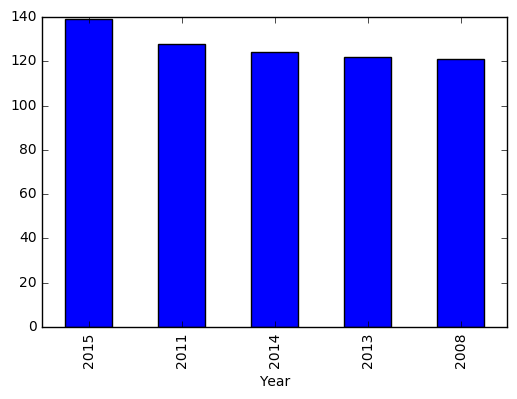

In [44]:
#IY = Incident/Year incidentes por año

IY = data_ta2.copy() 

IY = IY[['Year']].groupby(['Year']).size().sort_values(ascending=False) #Devuelve los años con mas incidentes rank 3

print IY.head(5)
IY.head(5).plot.bar()

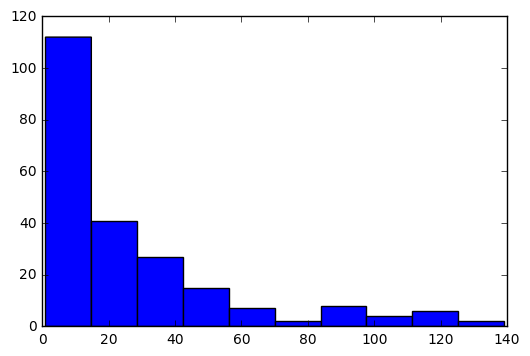

In [46]:
plt.hist(IY); # colocamos la coma para que no se muestren los valores que se plotean


1642
2016


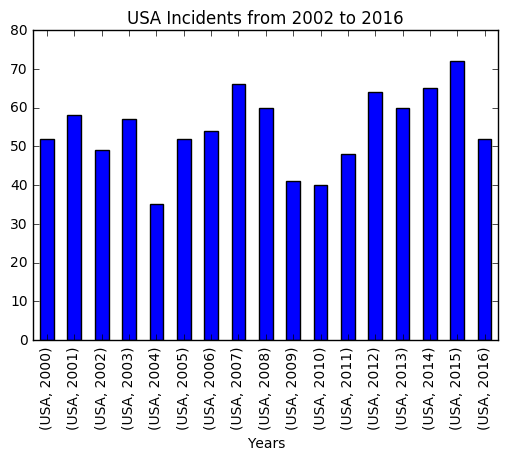

In [47]:
# CY country/Year evolution
CY3 = data_ta2.copy()

CY3 = CY3[['Country','Year']].groupby(['Country','Year'],sort=True).size()
CY3
print CY3['USA'].index.values.min()
print CY3['USA'].index.values.max()


# USA Incidents from 2002 to 2016

CY3.loc[('USA'), 2000:2016].plot.bar()
plt.xlabel('Years')
plt.title('USA Incidents from 2002 to 2016')



#plt.hist(CY3['USA'],len(CY3['USA'].index.values));

#plt.xlabel(CY3['USA'].index.values)

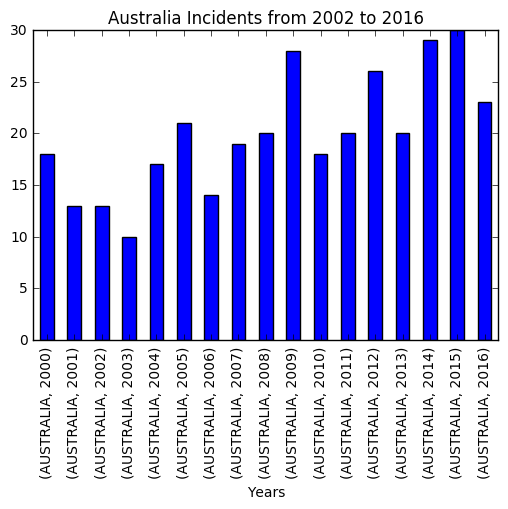

In [48]:
# Australia Incidents from 2002 to 2016
CY3.loc[('AUSTRALIA'), 2000:2016].plot.bar() 
plt.xlabel('Years')
plt.title('Australia Incidents from 2002 to 2016')

## 5. Distribución y correlaciones (ii)
A continuación, queremos examinar el sexo y la edad de los implicados en incidentes.
Mostrad la distribución de los incidentes por sexo, e intentad obtener la media de la edad de los
implicados en los incidentes.

Observad:

1. Valores nulos o valores que parecen incorrectos.
1. El tipo de los valores de la columna "Age". Si fuese necesario cambiarlos, buscar formas de
1. convertir de valores de cadena a valores numéricos en pandas.

In [83]:
#Sex/Age Analysis
cols = ['Sex ', 'Age']
por_sexo = data_ta[cols].dropna()


In [98]:
por_sexo['Sex '].unique()

array(['M', 'F', 'M ', 'lli'], dtype=object)

In [105]:
por_sexo = por_sexo[(por_sexo['Sex ']=='F') | (por_sexo['Sex ']=='M')]

In [106]:
por_sexo.groupby('Sex ').count()

,Age
Sex,
F,426
M,2841


Analisis por Edad

In [118]:
#Por Edad
por_edad = data_ta[cols].dropna()#Borramos NA

In [122]:
por_edad['Age'].unique()

array(['16', '36', '43', '60s', '51', '50', '12', '9', '22', '25', '37',
       '20', '49', '15', '21', '40', '72', '18', '29', '31', '11', '10',
       '59', '42', '34', '35', '19', '6', '27', '64', '60', '23', '52',
       '13', '57', '48', '39', '24', '26', '69', '46', 'Teen', '41', '45',
       '65', '38', '71', '32', '58', '28', '54', '44', '14', '7', '62',
       '40s', '68', '47', '17', '30', '63', '70', '18 months', '53', '20s',
       '33', '30s', '50s', '8', '61', '55', 'teen', '66', '77', '74', '3',
       '56', '28 & 26', '5', '86', '18 or 20', '12 or 13', '46 & 34',
       '28, 23 & 30', 'Teens', '8 or 10', '84', '\xa0 ', ' ', '30 or 36',
       '6\xbd', '21 & ?', '75', '33 or 37', 'mid-30s', '73', '23 & 20',
       ' 30', '7      &    31', ' 28', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ',
       '45 ', '21 or 26', '20 ', '>50', '18 to 22', 'adult', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 

In [129]:
por_edad['Age'] = pd.to_numeric(por_edad['Age'],errors='coerce') # to_numeric, convierte los valores a numerocos y los errores los vuelve NaN
por_edad.mean()

Age    27.148615
dtype: float64